# Выпускная квалификационная работа по курсу "Data Science"

# Тема: Прогнозирование конечных свойств новых материалов (композиционных материалов)¶

1) Проведем разведочный анализ данных. Загрузим необходимые библиотеки и данные.

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib
import seaborn as sns
from sklearn import preprocessing

Загрузим данные и объединим их.

In [3]:
x_bp_df=pd.read_excel("D:\\X_bp.xlsx")

In [4]:
x_nup_df=pd.read_excel("D:\\X_nup.xlsx")

In [5]:
bp_nup_df = x_bp_df.merge(x_nup_df, left_index=True, right_index=True, how='inner')

In [6]:
bp_nup_df.head(5)

,Unnamed: 0_x,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Unnamed: 0_y,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,0,4.0,57.0
1,1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,1,0,4.0,60.0
2,2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,2,0,4.0,70.0
3,3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,3,0,5.0,47.0
4,4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,4,0,5.0,57.0


In [7]:
bp_nup_df.drop(columns = ['Unnamed: 0_x', 'Unnamed: 0_y'],axis = 1, inplace=True)

In [8]:
bp_nup_df.head(5)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [9]:
bp_nup_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [10]:
bp_nup_df.duplicated().sum()

0

In [11]:
bp_nup_df.isna()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,False,False,False,False,False,False,False,False,False,False,False,False,False
1019,False,False,False,False,False,False,False,False,False,False,False,False,False
1020,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
bp_nup_df.isna().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Можно сделать вывод, что пропусков в объединенной таблице нет.

In [13]:
bp_nup_df.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


In [14]:
bp_nup_df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [15]:
import matplotlib.pyplot as plt

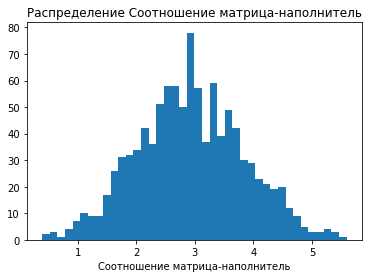

In [16]:
plt.title("Распределение Соотношение матрица-наполнитель")
plt.xlabel("Соотношение матрица-наполнитель")
plt.hist(bp_nup_df["Соотношение матрица-наполнитель"], bins = 40)
plt.show()

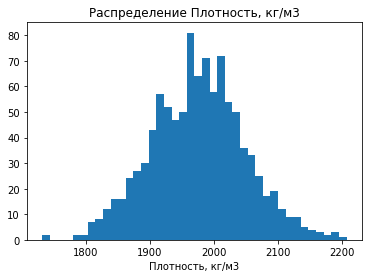

In [17]:
plt.title("Распределение Плотность, кг/м3")
plt.xlabel("Плотность, кг/м3")
plt.hist(bp_nup_df["Плотность, кг/м3"], bins = 40)
plt.show()

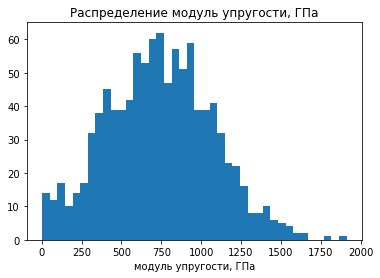

In [18]:
plt.title("Распределение модуль упругости, ГПа")
plt.xlabel("модуль упругости, ГПа")
plt.hist(bp_nup_df["модуль упругости, ГПа"], bins = 40)
plt.show()

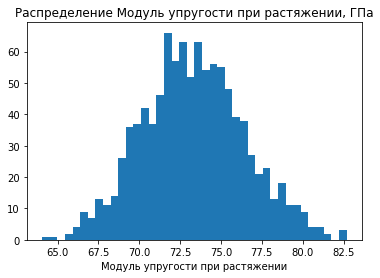

In [19]:
plt.title("Распределение Модуль упругости при растяжении, ГПа")
plt.xlabel("Модуль упругости при растяжении")
plt.hist(bp_nup_df["Модуль упругости при растяжении, ГПа"], bins = 40)
plt.show()

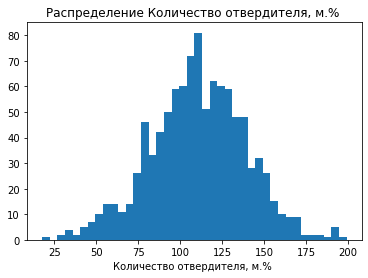

In [20]:
plt.title("Распределение Количество отвердителя, м.% ")
plt.xlabel("Количество отвердителя, м.% ")
plt.hist(bp_nup_df["Количество отвердителя, м.%"], bins = 40)
plt.show()

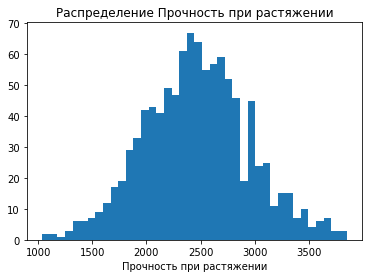

In [21]:
plt.title("Распределение Прочность при растяжении")
plt.xlabel("Прочность при растяжении")
plt.hist(bp_nup_df["Прочность при растяжении, МПа"], bins = 40)
plt.show()

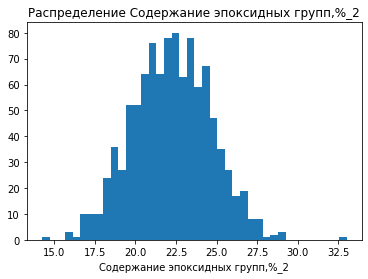

In [22]:
plt.title("Распределение Содержание эпоксидных групп,%_2")
plt.xlabel("Содержание эпоксидных групп,%_2")
plt.hist(bp_nup_df["Содержание эпоксидных групп,%_2"], bins = 40)
plt.show()

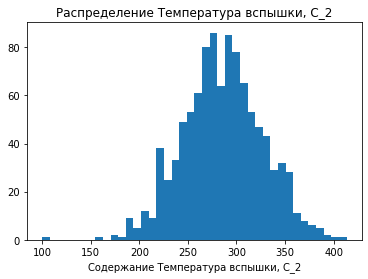

In [23]:
plt.title("Распределение Температура вспышки, С_2")
plt.xlabel("Содержание Температура вспышки, С_2")
plt.hist(bp_nup_df["Температура вспышки, С_2"], bins = 40)
plt.show()

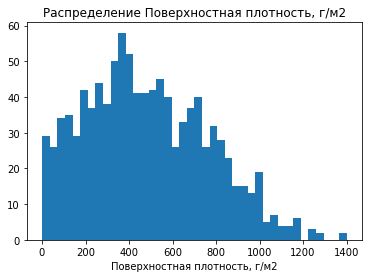

In [24]:
plt.title("Распределение Поверхностная плотность, г/м2")
plt.xlabel("Поверхностная плотность, г/м2")
plt.hist(bp_nup_df["Поверхностная плотность, г/м2"], bins = 40)
plt.show()

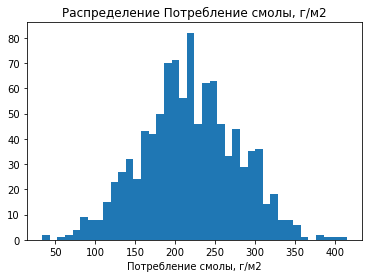

In [25]:
plt.title("Распределение Потребление смолы, г/м2")
plt.xlabel("Потребление смолы, г/м2")
plt.hist(bp_nup_df["Потребление смолы, г/м2"], bins = 40)
plt.show()

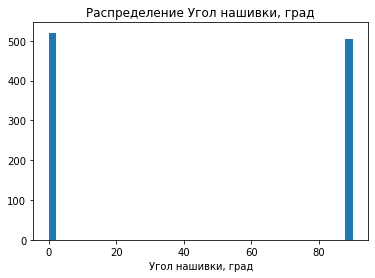

In [26]:
plt.title("Распределение Угол нашивки, град")
plt.xlabel("Угол нашивки, град")
plt.hist(bp_nup_df["Угол нашивки, град"], bins = 40)
plt.show()

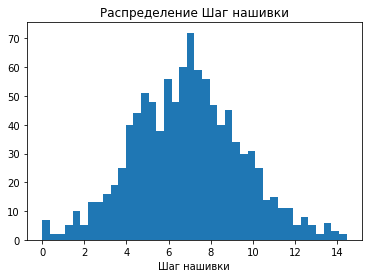

In [27]:
plt.title("Распределение Шаг нашивки")
plt.xlabel("Шаг нашивки")
plt.hist(bp_nup_df["Шаг нашивки"], bins = 40)
plt.show()

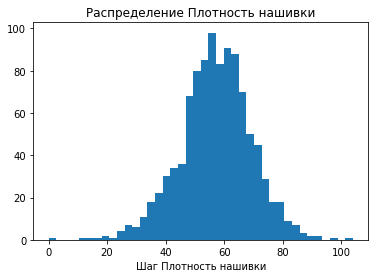

In [28]:
plt.title("Распределение Плотность нашивки")
plt.xlabel("Шаг Плотность нашивки")
plt.hist(bp_nup_df["Плотность нашивки"], bins = 40)
plt.show()

In [29]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='Соотношение матрица-наполнитель', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='Плотность, кг/м3', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='модуль упругости, ГПа', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='Количество отвердителя, м.%', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='Содержание эпоксидных групп,%_2', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='Температура вспышки, С_2', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='Поверхностная плотность, г/м2', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='Модуль упругости при растяжении, ГПа', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='Прочность при растяжении, МПа', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='Потребление смолы, г/м2', ylabel='Соотношение матриц

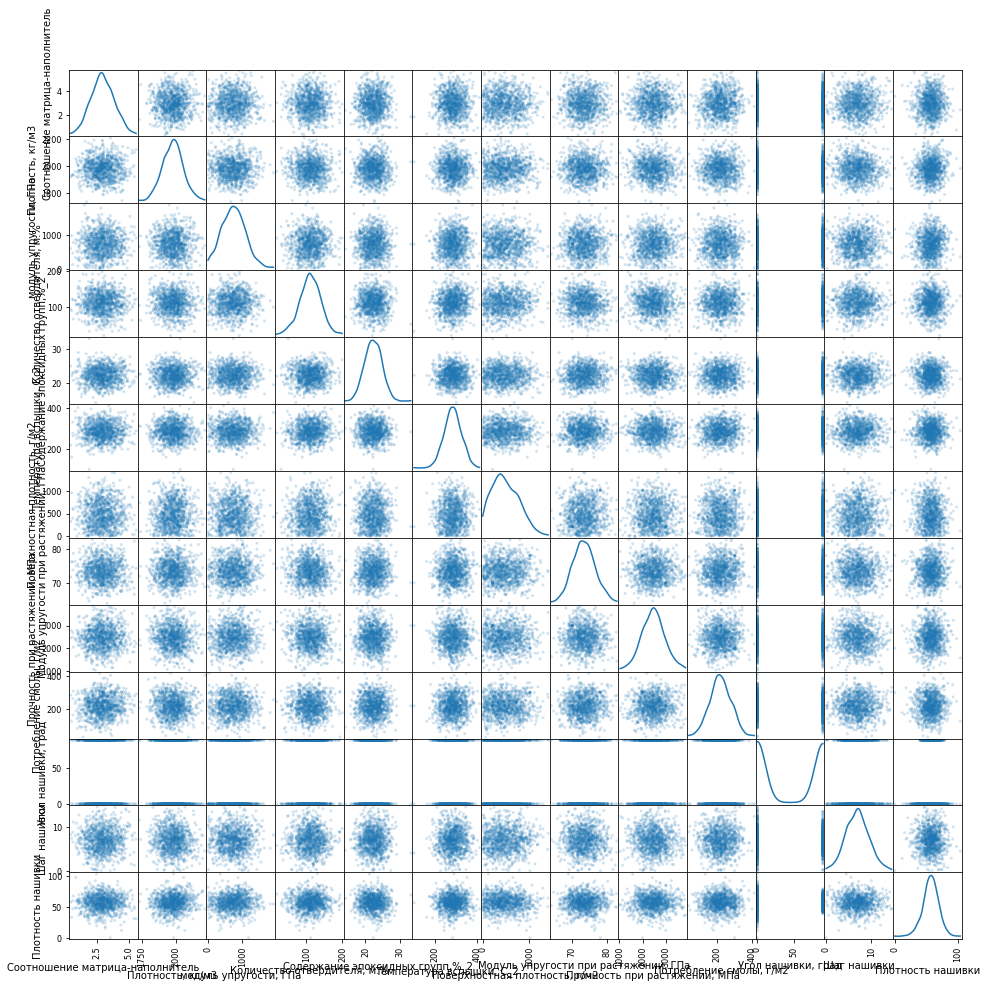

In [30]:
scatter_matrix(bp_nup_df,alpha=0.2, figsize=(16,16),diagonal='kde')

Данные не имеют четко выраженной зависимости

<AxesSubplot:>

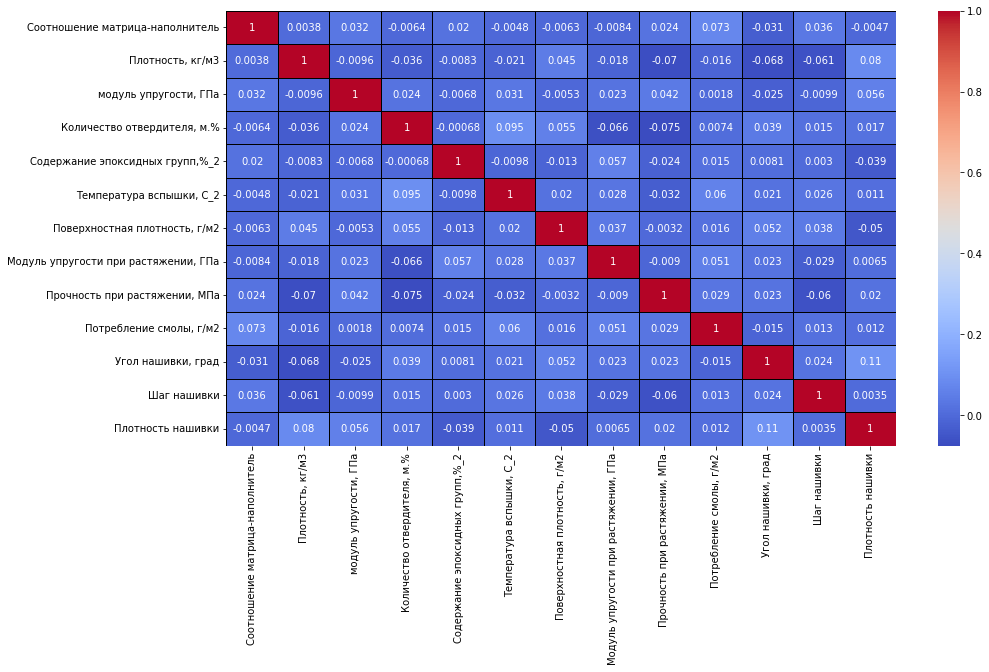

In [31]:
plt.figure(figsize = (15, 8))
sns.heatmap(bp_nup_df.corr(), cmap = "coolwarm", annot = True, linewidths=1, linecolor='black')

Максимальная корреляция между Плотностью нашивки и углом нашивки и составляет 0.11, что говорит об отсутствии зависимости между этими данными. Корреляция между всеми параметрами очень близка к 0, что говорит об отсутствии корреляционных связей между переменными.

Сделаем диаграммы ящика с усами

In [33]:
from matplotlib.pyplot import boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x27edac249a0>,
 'caps': [<matplotlib.lines.Line2D at 0x27edac35100>,
 'boxes': [<matplotlib.lines.Line2D at 0x27edac24610>,
 'medians': [<matplotlib.lines.Line2D at 0x27edac35820>,
 'fliers': [<matplotlib.lines.Line2D at 0x27edac35bb0>,
 'means': []}

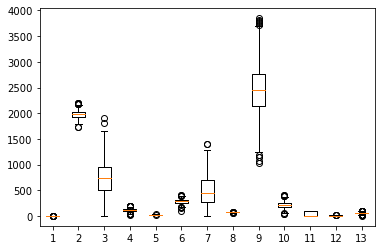

In [34]:
boxplot(bp_nup_df)

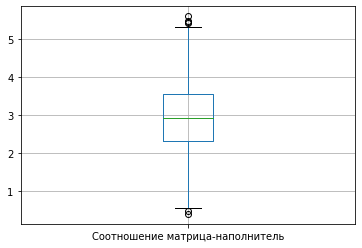

In [35]:
boxplot=bp_nup_df.boxplot(column=['Соотношение матрица-наполнитель'])

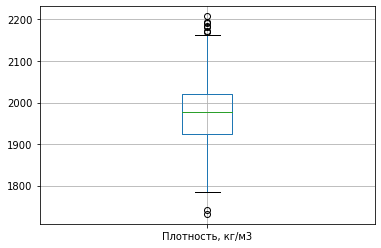

In [36]:
boxplot=bp_nup_df.boxplot(column=['Плотность, кг/м3'])

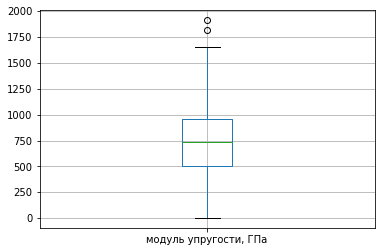

In [37]:
boxplot=bp_nup_df.boxplot(column=['модуль упругости, ГПа'])

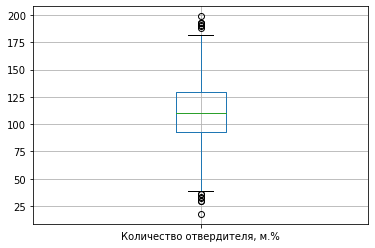

In [38]:
boxplot=bp_nup_df.boxplot(column=['Количество отвердителя, м.%'])

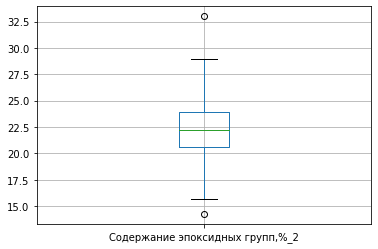

In [39]:
boxplot=bp_nup_df.boxplot(column=['Содержание эпоксидных групп,%_2'])

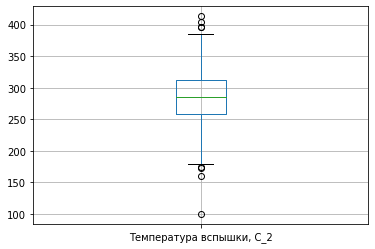

In [40]:
boxplot=bp_nup_df.boxplot(column=['Температура вспышки, С_2'])

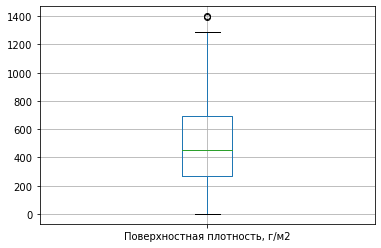

In [41]:
boxplot=bp_nup_df.boxplot(column=['Поверхностная плотность, г/м2'])

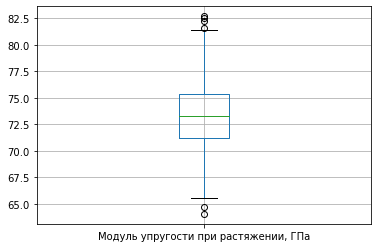

In [42]:
boxplot=bp_nup_df.boxplot(column=['Модуль упругости при растяжении, ГПа'])

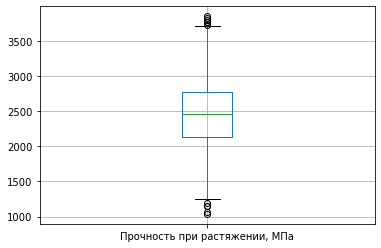

In [43]:
boxplot=bp_nup_df.boxplot(column=['Прочность при растяжении, МПа'])

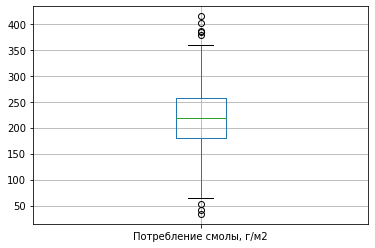

In [44]:
boxplot=bp_nup_df.boxplot(column=['Потребление смолы, г/м2'])

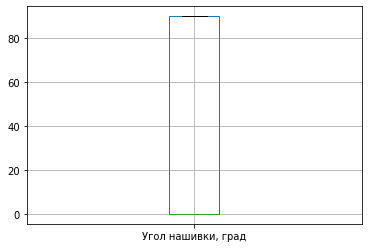

In [45]:
boxplot=bp_nup_df.boxplot(column=['Угол нашивки, град'])

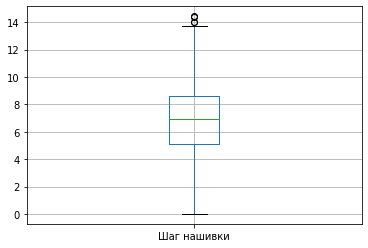

In [46]:
boxplot=bp_nup_df.boxplot(column=['Шаг нашивки'])

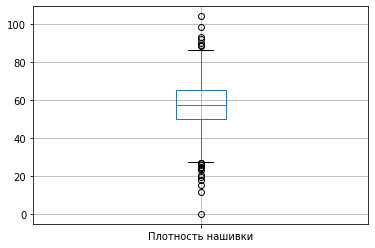

In [47]:
boxplot=bp_nup_df.boxplot(column=['Плотность нашивки'])

Определим выбросы в данных.

In [49]:
df_1=bp_nup_df.copy()

In [50]:
df_2=bp_nup_df.copy()

In [51]:
df_3=bp_nup_df.copy()

Метод трех сигм

In [52]:
df_1["mn_z"] = (df_1["Соотношение матрица-наполнитель"] - df_1["Соотношение матрица-наполнитель"].mean()) / df_1["Соотношение матрица-наполнитель"].std()
sum(abs(df_1["mn_z"]) > 3)

0

In [53]:
df_1["pl_z"] = (df_1["Плотность, кг/м3"] - df_1["Плотность, кг/м3"].mean()) / df_1["Плотность, кг/м3"].std()
sum(abs(df_1["pl_z"]) > 3)

3

In [54]:
df_1["mu_z"] = (df_1["модуль упругости, ГПа"] - df_1["модуль упругости, ГПа"].mean()) / df_1["модуль упругости, ГПа"].std()
sum(abs(df_1["mu_z"]) > 3)

2

In [55]:
df_1["ko_z"] = (df_1["Количество отвердителя, м.%"] - df_1["Количество отвердителя, м.%"].mean()) / df_1["Количество отвердителя, м.%"].std()
sum(abs(df_1["ko_z"]) > 3)

2

In [56]:
df_1["se_z"] = (df_1["Содержание эпоксидных групп,%_2"] - df_1["Содержание эпоксидных групп,%_2"].mean()) / df_1["Содержание эпоксидных групп,%_2"].std()
sum(abs(df_1["se_z"]) > 3)

2

In [57]:
df_1["t_z"] = (df_1["Температура вспышки, С_2"] - df_1["Температура вспышки, С_2"].mean()) / df_1["Температура вспышки, С_2"].std()
sum(abs(df_1["t_z"]) > 3)

3

In [59]:
df_1["pp_z"] = (df_1["Поверхностная плотность, г/м2"] - df_1["Поверхностная плотность, г/м2"].mean()) / df_1["Поверхностная плотность, г/м2"].std()
sum(abs(df_1["pp_z"]) > 3)

2

In [60]:
df_1["mur_z"] = (df_1["Модуль упругости при растяжении, ГПа"] - df_1["Модуль упругости при растяжении, ГПа"].mean()) / df_1["Модуль упругости при растяжении, ГПа"].std()
sum(abs(df_1["mur_z"]) > 3)

0

In [61]:
df_1["pr_z"] = (df_1["Прочность при растяжении, МПа"] - df_1["Прочность при растяжении, МПа"].mean()) / df_1["Прочность при растяжении, МПа"].std()
sum(abs(df_1["pr_z"]) > 3)

0

In [62]:
df_1["psm_z"] = (df_1["Потребление смолы, г/м2"] - df_1["Потребление смолы, г/м2"].mean()) / df_1["Потребление смолы, г/м2"].std()
sum(abs(df_1["psm_z"]) > 3)

3

In [63]:
df_1["un_z"] = (df_1["Угол нашивки, град"] - df_1["Угол нашивки, град"].mean()) / df_1["Угол нашивки, град"].std()
sum(abs(df_1["un_z"]) > 3)

0

In [64]:
df_1["shn_z"] = (df_1["Шаг нашивки"] - df_1["Шаг нашивки"].mean()) / df_1["Шаг нашивки"].std()
sum(abs(df_1["shn_z"]) > 3)

0

In [65]:
df_1["pln_z"] = (df_1["Плотность нашивки"] - df_1["Плотность нашивки"].mean()) / df_1["Плотность нашивки"].std()
sum(abs(df_1["pln_z"]) > 3)

7

Изолированный лес

In [66]:
from sklearn.ensemble import IsolationForest

In [67]:
isf = IsolationForest(n_estimators=100, random_state=42, contamination=0.02)

In [73]:
preds = isf.fit_predict(df_2[["Соотношение матрица-наполнитель", "Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%", "Содержание эпоксидных групп,%_2", "Температура вспышки, С_2", "Поверхностная плотность, г/м2", "Модуль упругости при растяжении, ГПа", "Прочность при растяжении, МПа", "Потребление смолы, г/м2", "Угол нашивки, град", "Шаг нашивки", "Плотность нашивки"]])

df_2["iso_forest_outliers"] = preds
df_2["iso_forest_scores"] = isf.decision_function(bp_nup_df[["Соотношение матрица-наполнитель", "Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%", "Содержание эпоксидных групп,%_2", "Температура вспышки, С_2", "Поверхностная плотность, г/м2", "Модуль упругости при растяжении, ГПа", "Прочность при растяжении, МПа", "Потребление смолы, г/м2", "Угол нашивки, град", "Шаг нашивки", "Плотность нашивки"]])

print(df_2["iso_forest_outliers"].value_counts())

 1    1002
-1      21
Name: iso_forest_outliers, dtype: int64


In [74]:
isf = IsolationForest(n_estimators=50, random_state=42, contamination=0.02)

preds = isf.fit_predict(df_2[["Соотношение матрица-наполнитель", "Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%", "Содержание эпоксидных групп,%_2", "Температура вспышки, С_2", "Поверхностная плотность, г/м2", "Модуль упругости при растяжении, ГПа", "Прочность при растяжении, МПа", "Потребление смолы, г/м2", "Угол нашивки, град", "Шаг нашивки", "Плотность нашивки"]])

df_2["iso_forest_outliers"] = preds
df_2["iso_forest_scores"] = isf.decision_function(bp_nup_df[["Соотношение матрица-наполнитель", "Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%", "Содержание эпоксидных групп,%_2", "Температура вспышки, С_2", "Поверхностная плотность, г/м2", "Модуль упругости при растяжении, ГПа", "Прочность при растяжении, МПа", "Потребление смолы, г/м2", "Угол нашивки, град", "Шаг нашивки", "Плотность нашивки"]])

print(df_2["iso_forest_outliers"].value_counts())

 1    1002
-1      21
Name: iso_forest_outliers, dtype: int64


In [75]:
isf = IsolationForest(n_estimators=200, random_state=42, contamination=0.02)

preds = isf.fit_predict(df_2[["Соотношение матрица-наполнитель", "Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%", "Содержание эпоксидных групп,%_2", "Температура вспышки, С_2", "Поверхностная плотность, г/м2", "Модуль упругости при растяжении, ГПа", "Прочность при растяжении, МПа", "Потребление смолы, г/м2", "Угол нашивки, град", "Шаг нашивки", "Плотность нашивки"]])

df_2["iso_forest_outliers"] = preds
df_2["iso_forest_scores"] = isf.decision_function(bp_nup_df[["Соотношение матрица-наполнитель", "Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%", "Содержание эпоксидных групп,%_2", "Температура вспышки, С_2", "Поверхностная плотность, г/м2", "Модуль упругости при растяжении, ГПа", "Прочность при растяжении, МПа", "Потребление смолы, г/м2", "Угол нашивки, град", "Шаг нашивки", "Плотность нашивки"]])

print(df_2["iso_forest_outliers"].value_counts())

 1    1002
-1      21
Name: iso_forest_outliers, dtype: int64


In [76]:
isf = IsolationForest(n_estimators=500, random_state=42, contamination=0.02)

preds = isf.fit_predict(df_2[["Соотношение матрица-наполнитель", "Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%", "Содержание эпоксидных групп,%_2", "Температура вспышки, С_2", "Поверхностная плотность, г/м2", "Модуль упругости при растяжении, ГПа", "Прочность при растяжении, МПа", "Потребление смолы, г/м2", "Угол нашивки, град", "Шаг нашивки", "Плотность нашивки"]])

df_2["iso_forest_outliers"] = preds
df_2["iso_forest_scores"] = isf.decision_function(bp_nup_df[["Соотношение матрица-наполнитель", "Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%", "Содержание эпоксидных групп,%_2", "Температура вспышки, С_2", "Поверхностная плотность, г/м2", "Модуль упругости при растяжении, ГПа", "Прочность при растяжении, МПа", "Потребление смолы, г/м2", "Угол нашивки, град", "Шаг нашивки", "Плотность нашивки"]])

print(df_2["iso_forest_outliers"].value_counts())

 1    1002
-1      21
Name: iso_forest_outliers, dtype: int64


In [77]:
isf = IsolationForest(n_estimators=1000, random_state=42, contamination=0.02)

preds = isf.fit_predict(df_2[["Соотношение матрица-наполнитель", "Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%", "Содержание эпоксидных групп,%_2", "Температура вспышки, С_2", "Поверхностная плотность, г/м2", "Модуль упругости при растяжении, ГПа", "Прочность при растяжении, МПа", "Потребление смолы, г/м2", "Угол нашивки, град", "Шаг нашивки", "Плотность нашивки"]])

df_2["iso_forest_outliers"] = preds
df_2["iso_forest_scores"] = isf.decision_function(bp_nup_df[["Соотношение матрица-наполнитель", "Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%", "Содержание эпоксидных групп,%_2", "Температура вспышки, С_2", "Поверхностная плотность, г/м2", "Модуль упругости при растяжении, ГПа", "Прочность при растяжении, МПа", "Потребление смолы, г/м2", "Угол нашивки, град", "Шаг нашивки", "Плотность нашивки"]])

print(df_2["iso_forest_outliers"].value_counts())

 1    1002
-1      21
Name: iso_forest_outliers, dtype: int64


Поиск выбросов на основе межквартильного расстояния

In [78]:
for col in df_3.columns:
    q75,q25 = np.percentile(df_3.loc[:,col],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df_3.loc[bp_nup_df[col] < min,col] = np.nan
    df_3.loc[bp_nup_df[col] > max,col] = np.nan

In [79]:
df_3.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

In [80]:
df_3 = df_3.dropna(axis=0)

In [81]:
df_3.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [82]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       936 non-null    float64
 1   Плотность, кг/м3                      936 non-null    float64
 2   модуль упругости, ГПа                 936 non-null    float64
 3   Количество отвердителя, м.%           936 non-null    float64
 4   Содержание эпоксидных групп,%_2       936 non-null    float64
 5   Температура вспышки, С_2              936 non-null    float64
 6   Поверхностная плотность, г/м2         936 non-null    float64
 7   Модуль упругости при растяжении, ГПа  936 non-null    float64
 8   Прочность при растяжении, МПа         936 non-null    float64
 9   Потребление смолы, г/м2               936 non-null    float64
 10  Угол нашивки, град                    936 non-null    float64
 11  Шаг нашивки       

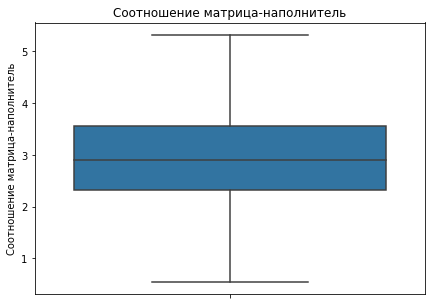

Минимальное значение: 0.547391007365624
Максимальное значение: 5.3141436851035
Среднее значение: 2.925683381793367
Медианное значение: 2.904730696156465


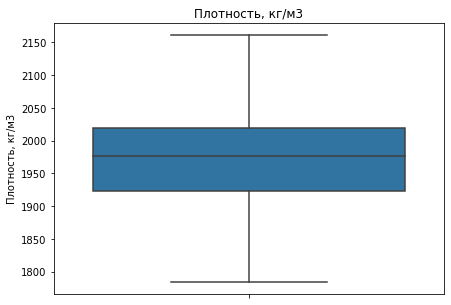

Минимальное значение: 1784.48224524858
Максимальное значение: 2161.56521646388
Среднее значение: 1974.0400234046288
Медианное значение: 1977.2580428731148


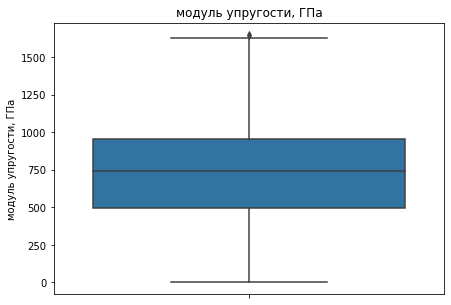

Минимальное значение: 2.4369087535075
Максимальное значение: 1649.41570587587
Среднее значение: 738.247626760584
Медианное значение: 738.736842105263


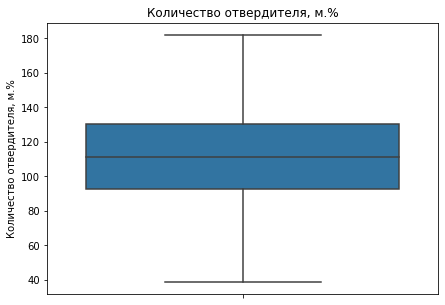

Минимальное значение: 38.6685003343557
Максимальное значение: 181.82844779488
Среднее значение: 110.91621571054407
Медианное значение: 111.11317502464999


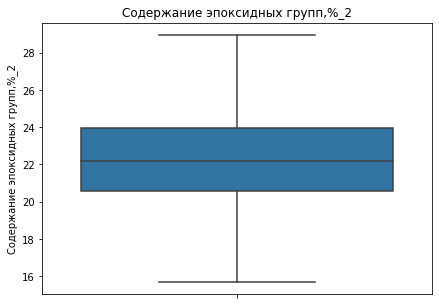

Минимальное значение: 15.6958938036288
Максимальное значение: 28.9550943746499
Среднее значение: 22.20903047048597
Медианное значение: 22.184712531998002


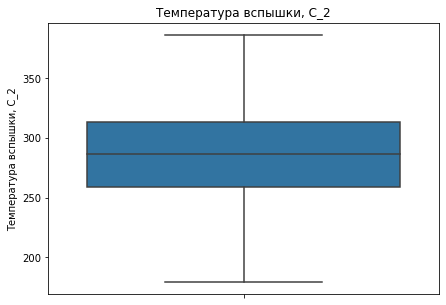

Минимальное значение: 179.37439137039
Максимальное значение: 386.067991779505
Среднее значение: 286.04041424804393
Медианное значение: 286.024117532195


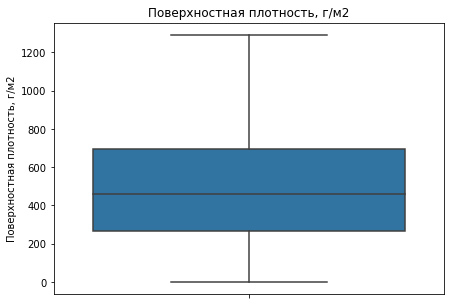

Минимальное значение: 0.603739925153945
Максимальное значение: 1291.34011463545
Среднее значение: 482.9939014162405
Медианное значение: 457.7322458016435


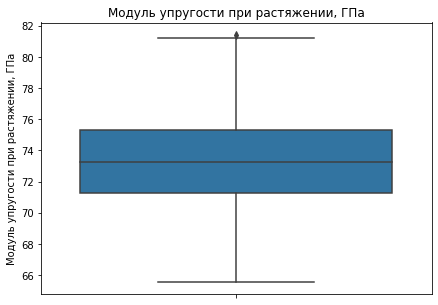

Минимальное значение: 65.5533359100584
Максимальное значение: 81.4171259444738
Среднее значение: 73.30512659759603
Медианное значение: 73.25922960132405


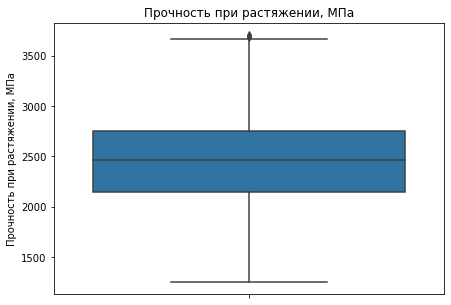

Минимальное значение: 1250.39280220501
Максимальное значение: 3705.67252336168
Среднее значение: 2467.488822012067
Медианное значение: 2457.9597673317303


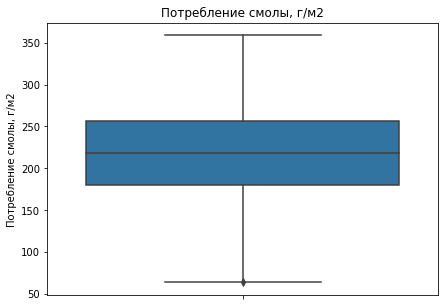

Минимальное значение: 63.6856983307984
Максимальное значение: 359.052219789673
Среднее значение: 217.61337420042463
Медианное значение: 218.388714705812


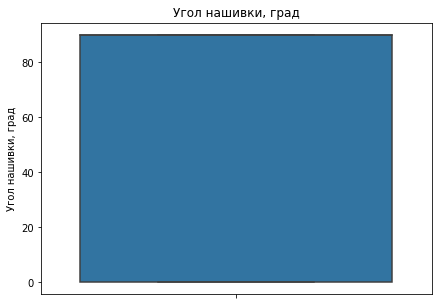

Минимальное значение: 0.0
Максимальное значение: 90.0
Среднее значение: 46.05769230769231
Медианное значение: 90.0


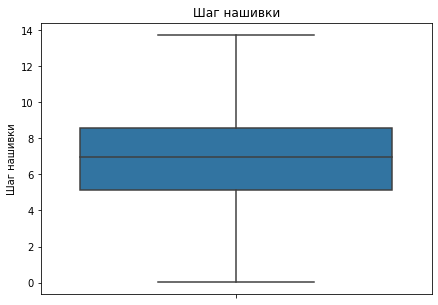

Минимальное значение: 0.0376389366987437
Максимальное значение: 13.732404403383
Среднее значение: 6.91558459970514
Медианное значение: 6.943336869815219


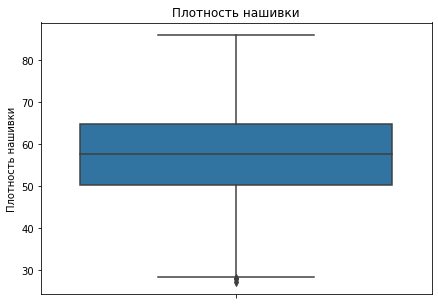

Минимальное значение: 27.2729280063294
Максимальное значение: 86.0124270098611
Среднее значение: 57.451895023129765
Медианное значение: 57.584224985771854


In [84]:
for col in df_3.columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(data = df_3, y=df_3[col])
    plt.title(col)
    plt.show()
    print(f'Минимальное значение: {df_3[col].min()}')
    print(f'Максимальное значение: {df_3[col].max()}')
    print(f'Среднее значение: {df_3[col].mean()}')
    print(f'Медианное значение: {df_3[col].median()}')

Нормализуем значения с помощью метода MinMaxScaler

In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
min_max_scaler = MinMaxScaler()
df_norm = pd.DataFrame(min_max_scaler.fit_transform(df_3), columns = df_3.columns, index=df_3.index)

In [87]:
df_norm.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,0.498933,0.502695,0.446764,0.504664,0.491216,0.516059,0.373733,0.488647,0.495706,0.521141,0.511752,0.502232,0.513776
std,0.187489,0.187779,0.199583,0.188865,0.180620,0.190624,0.217078,0.191466,0.188915,0.195781,0.500129,0.183258,0.191342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.372274,0.368517,0.301243,0.376190,0.367716,0.386128,0.205619,0.359024,0.365149,0.392067,0.000000,0.372211,0.390482
50%,0.494538,0.511229,0.447061,0.506040,0.489382,0.515980,0.354161,0.485754,0.491825,0.523766,1.000000,0.504258,0.516029
75%,0.629204,0.624999,0.580446,0.637978,0.623410,0.646450,0.538683,0.615077,0.612874,0.652447,1.000000,0.624604,0.638842
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:xlabel='Соотношение матрица-наполнитель', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='Плотность, кг/м3', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='модуль упругости, ГПа', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='Количество отвердителя, м.%', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='Содержание эпоксидных групп,%_2', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='Температура вспышки, С_2', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='Поверхностная плотность, г/м2', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='Модуль упругости при растяжении, ГПа', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='Прочность при растяжении, МПа', ylabel='Соотношение матрица-наполнитель'>,
        <AxesSubplot:xlabel='Потребление смолы, г/м2', ylabel='Соотношение матриц

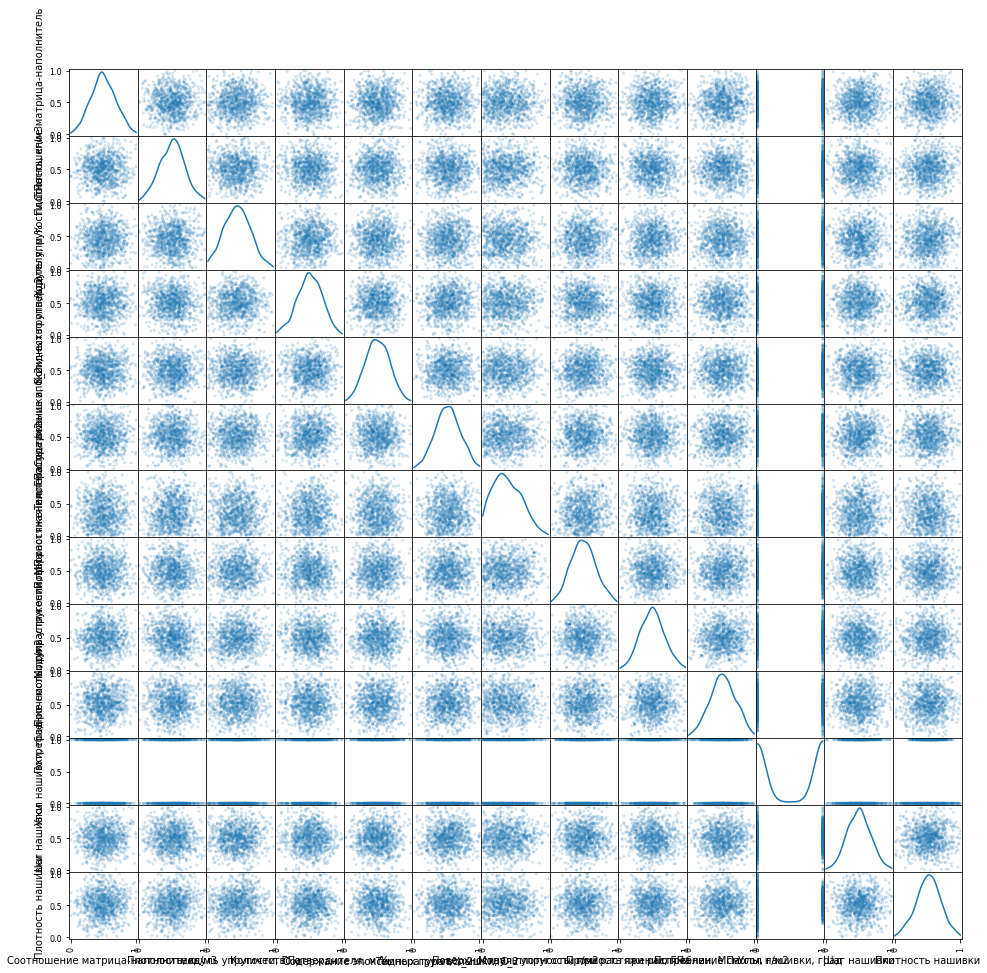

In [89]:
scatter_matrix(df_norm,alpha=0.2, figsize=(16,16),diagonal='kde')

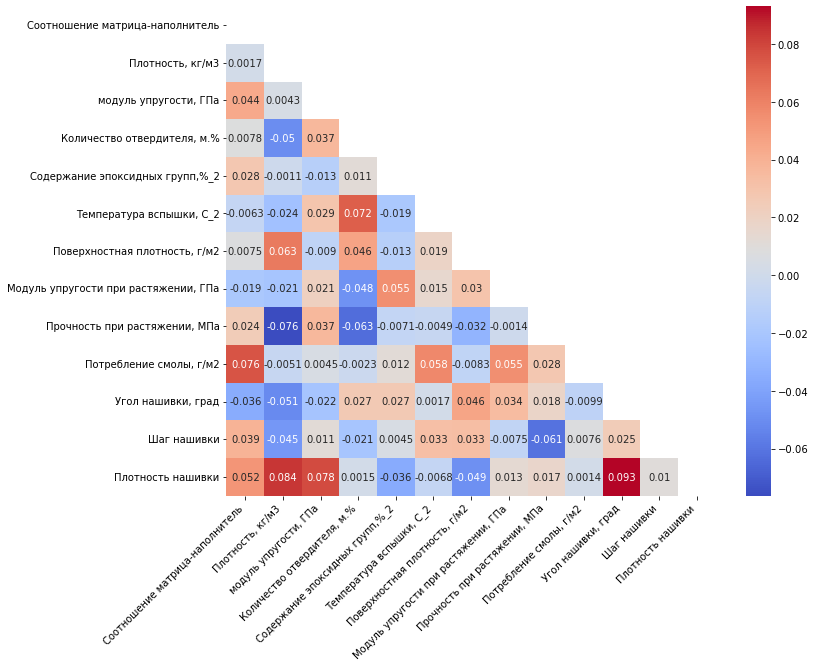

In [90]:
mask = np.triu(df_norm.corr())
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_norm.corr(), mask=mask, annot=True, square=True, cmap='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.show()

2) Построение моделей для прогноза модуля упругости при растяжении и прочности при растяжении

In [91]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

Разбиваем данные на обучающую и тестовую выборки

In [93]:
x_upr = df_3.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
x_pr = df_3.drop(['Прочность при растяжении, МПа'], axis=1)
y_upr = df_3[['Модуль упругости при растяжении, ГПа']]
y_pr = df_3[['Прочность при растяжении, МПа']]

X_train_upr, X_test_upr, y_train_upr, y_test_upr = train_test_split(x_upr, y_upr, test_size=0.3, random_state=1)
X_train_pr, X_test_pr, y_train_pr, y_test_pr = train_test_split(x_pr, y_pr, test_size=0.3, random_state=1)

Метод К ближайших соседей

In [94]:
knr = KNeighborsRegressor()
knr_params = {'n_neighbors' : range(1, 301, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
GSCV_knr_upr = GridSearchCV(knr, knr_params, n_jobs=-1, cv=10)
GSCV_knr_upr.fit(X_train_upr, y_train_upr)
GSCV_knr_upr.best_params_

{'algorithm': 'auto', 'n_neighbors': 183, 'weights': 'uniform'}

In [95]:
knr_upr = GSCV_knr_upr.best_estimator_
print(f'R2-score KNR для модуля упругости при растяжении: {knr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score KNR для модуля упругости при растяжении: -0.001


In [96]:
models = pd.DataFrame()

In [97]:
knr_upr_result = pd.DataFrame({
   'Model': 'KNeighborsRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, knr_upr.predict(X_test_upr)), 
   'R2 score': knr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [98]:
models = models.append(knr_upr_result)

In [99]:
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,2.517884,-0.001


In [100]:
GSCV_knr_pr = GridSearchCV(knr, knr_params, n_jobs=-1, cv=10)
GSCV_knr_pr.fit(X_train_pr, y_train_pr)
GSCV_knr_pr.best_params_

{'algorithm': 'brute', 'n_neighbors': 61, 'weights': 'distance'}

In [101]:
knr_pr = GSCV_knr_pr.best_estimator_
print(f'R2-score KNR для прочности при растяжении: {knr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score KNR для прочности при растяжении: -0.009


In [102]:
knr_pr_result = pd.DataFrame({
   'Model': 'KNeighborsRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, knr_pr.predict(X_test_pr)), 
   'R2 score': knr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [103]:
models = models.append(knr_pr_result)

In [104]:
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,2.517884,-0.001
Прочность при растяжении,KNeighborsRegressor_pr,368.126111,-0.009


Линейная регрессия

In [106]:
lr = LinearRegression()
lr_params = {
    'fit_intercept' : ['True', 'False']
}
GSCV_lr_upr = GridSearchCV(lr, lr_params, n_jobs=-1, cv=10)
GSCV_lr_upr.fit(X_train_upr, y_train_upr)
GSCV_lr_upr.best_params_

{'fit_intercept': 'True'}

In [107]:
lr_upr = GSCV_lr_upr.best_estimator_
print(f'R2-score LR для модуля упругости при растяжении: {lr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score LR для модуля упругости при растяжении: -0.021


In [108]:
lr_upr_result = pd.DataFrame({
   'Model': 'LinearRegression_upr', 
   'MAE': mean_absolute_error(y_test_upr, lr_upr.predict(X_test_upr)), 
   'R2 score': lr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [109]:
models = models.append(lr_upr_result)
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,2.517884,-0.001
Прочность при растяжении,KNeighborsRegressor_pr,368.126111,-0.009
Модуль упругости при растяжении,LinearRegression_upr,2.546419,-0.021


In [110]:
GSCV_lr_pr = GridSearchCV(lr, lr_params, n_jobs=-1, cv=10)
GSCV_lr_pr.fit(X_train_pr, y_train_pr)
GSCV_lr_pr.best_params_

{'fit_intercept': 'True'}

In [111]:
lr_pr = GSCV_lr_pr.best_estimator_
print(f'R2-score LR для прочности при растяжении: {lr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score LR для прочности при растяжении: -0.021


In [112]:
lr_pr_result = pd.DataFrame({
   'Model': 'LinearRegression_pr', 
   'MAE': mean_absolute_error(y_test_pr, lr_pr.predict(X_test_pr)), 
   'R2 score': lr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [113]:
models = models.append(lr_pr_result)
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,2.517884,-0.001
Прочность при растяжении,KNeighborsRegressor_pr,368.126111,-0.009
Модуль упругости при растяжении,LinearRegression_upr,2.546419,-0.021
Прочность при растяжении,LinearRegression_pr,370.542618,-0.021


Случайный лес

In [115]:
rfr = RandomForestRegressor()
rfr_params = {
    'n_estimators' : range(10, 1000, 10),
    'criterion' : ['squared_error', 'absolute_error', 'poisson'],
    'max_depth' : range(1, 7),
    'min_samples_split' : range(20, 50, 5),
    'min_samples_leaf' : range(2, 8),
    'bootstrap' : ['True', 'False']
}
RSCV_rfr_upr = RandomizedSearchCV(rfr, rfr_params, n_jobs=-1, cv=10, verbose=4)
RSCV_rfr_upr.fit(X_train_upr, y_train_upr)
RSCV_rfr_upr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\79104\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan         nan         nan         nan
         nan         nan         nan -0.02569092]
  warnings.warn(
C:\Users\79104\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 170,
 'min_samples_split': 45,
 'min_samples_leaf': 5,
 'max_depth': 6,
 'criterion': 'poisson',
 'bootstrap': 'False'}

In [116]:
rfr_upr = RSCV_rfr_upr.best_estimator_
print(f'R2-score RFR для модуля упругости при растяжении: {rfr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score RFR для модуля упругости при растяжении: -0.061


In [117]:
rfr_upr_result = pd.DataFrame({
   'Model': 'RandomForestRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, rfr_upr.predict(X_test_upr)), 
   'R2 score': rfr_upr.score(X_test_upr, y_test_upr).round(3)
}, index=['Модуль упругости при растяжении'])

In [118]:
models = models.append(rfr_upr_result)
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,2.517884,-0.001
Прочность при растяжении,KNeighborsRegressor_pr,368.126111,-0.009
Модуль упругости при растяжении,LinearRegression_upr,2.546419,-0.021
Прочность при растяжении,LinearRegression_pr,370.542618,-0.021
Модуль упругости при растяжении,RandomForestRegressor_upr,2.597992,-0.061


In [119]:
RSCV_rfr_pr = RandomizedSearchCV(rfr, rfr_params, n_jobs=-1, cv=10, verbose=4)
RSCV_rfr_pr.fit(X_train_pr, y_train_pr)
RSCV_rfr_pr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\79104\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.04122933         nan         nan -0.04315955         nan         nan
 -0.04525184         nan         nan         nan]
  warnings.warn(
C:\Users\79104\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 940,
 'min_samples_split': 45,
 'min_samples_leaf': 7,
 'max_depth': 4,
 'criterion': 'poisson',
 'bootstrap': 'False'}

In [120]:
rfr_pr = RSCV_rfr_pr.best_estimator_
print(f'R2-score RFR для прочности при растяжении: {rfr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score RFR для прочности при растяжении: -0.013


In [121]:
rfr_pr_result = pd.DataFrame({
   'Model': 'RandomForestRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, rfr_pr.predict(X_test_pr)), 
   'R2 score': rfr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [122]:
models = models.append(rfr_pr_result)
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,2.517884,-0.001
Прочность при растяжении,KNeighborsRegressor_pr,368.126111,-0.009
Модуль упругости при растяжении,LinearRegression_upr,2.546419,-0.021
Прочность при растяжении,LinearRegression_pr,370.542618,-0.021
Модуль упругости при растяжении,RandomForestRegressor_upr,2.597992,-0.061
Прочность при растяжении,RandomForestRegressor_pr,370.967356,-0.013


In [139]:
from sklearn.neural_network import MLPRegressor

In [140]:
mlpr = MLPRegressor(random_state=2)
mlpr_params = {
    'hidden_layer_sizes' : [(100, 100, 50, 25, 12), (144, 144, 72, 36, 12, 1), (12, 12, 12, 12, 12),
                            (144, 144, 144, 72, 72, 36, 36), ()],
    'activation' : ['identity', 'logistic', 'tanh', 'relu'],
    'solver' : ['sgd', 'adam'],
    'max_iter' : [100],
    'learning_rate' : ['constant', 'adaptive', 'invscaling']
}

In [141]:
GSCV_mlpr_upr = GridSearchCV(mlpr, mlpr_params, n_jobs=-1, cv=10)
GSCV_mlpr_upr.fit(X_train_upr, y_train_upr)
GSCV_mlpr_upr.best_params_

C:\Users\79104\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [             nan -3.11858819e+000              nan -3.11858819e+000
              nan -3.11858819e+000              nan -1.09054687e+001
              nan -1.09054687e+001              nan -1.09054687e+001
              nan -7.15515805e+000              nan -7.15515805e+000
              nan -7.15515805e+000              nan -1.97143062e+000
              nan -1.97143062e+000              nan -1.97143062e+000
             -inf -5.33865318e+003              nan -5.33865318e+003
 -1.70451620e+202 -5.33865318e+003 -9.76934125e-003 -5.36569217e+002
 -9.52916565e-003 -5.36569217e+002 -2.77775569e+002 -5.36569217e+002
 -8.88241507e-003 -5.84359363e+002 -8.88241507e-003 -5.84359363e+002
 -5.00257909e+002 -5.84359363e+002 -1.29115219e-002 -5.38376463e+002
 -1.22529950e-002 -5.38376463e+002 -2.64701262e+002 -5.38376463e+002
 -8.75127093e-003 -4.30410229

{'activation': 'tanh',
 'hidden_layer_sizes': (144, 144, 144, 72, 72, 36, 36),
 'learning_rate': 'constant',
 'max_iter': 100,
 'solver': 'sgd'}

In [142]:
mlpr_upr = GSCV_mlpr_upr.best_estimator_
print(f'R2-score MLPR для модуля упругости при растяжении: {mlpr_upr.score(X_test_upr, y_test_upr).round(3)}')

R2-score MLPR для модуля упругости при растяжении: -0.0


In [144]:
mlpr_upr_result = pd.DataFrame({
   'Model': 'MLPRegressor_upr', 
   'MAE': mean_absolute_error(y_test_upr, mlpr_upr.predict(X_test_upr)), 
   'R2 score': mlpr_upr.score(X_test_upr, y_test_upr)
}, index=['Модуль упругости при растяжении'])

In [145]:
models = models.append(mlpr_upr_result)
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,2.517884,-0.001000
Прочность при растяжении,KNeighborsRegressor_pr,368.126111,-0.009000
Модуль упругости при растяжении,LinearRegression_upr,2.546419,-0.021000
Прочность при растяжении,LinearRegression_pr,370.542618,-0.021000
Модуль упругости при растяжении,RandomForestRegressor_upr,2.597992,-0.061000
Прочность при растяжении,RandomForestRegressor_pr,370.967356,-0.013000
Модуль упругости при растяжении,MLPRegressor_upr,2.514920,-0.000084


In [146]:
GSCV_mlpr_pr = GridSearchCV(mlpr, mlpr_params, n_jobs=-1, cv=10)
GSCV_mlpr_pr.fit(X_train_pr, y_train_pr)
GSCV_mlpr_pr.best_params_

C:\Users\79104\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [             nan -8.67132394e-002              nan -8.67132394e-002
              nan -8.67132394e-002              nan -9.15135098e-002
              nan -9.15135098e-002              nan -9.15135098e-002
              nan -9.23387341e-002              nan -9.23387341e-002
              nan -9.23387341e-002              nan -8.61950688e-002
              nan -8.61950688e-002              nan -8.61950688e-002
 -2.04944992e+287 -4.11892786e+001              nan -4.11892786e+001
 -6.69329389e+172 -4.11892786e+001 -1.65093957e-002 -2.98759161e+001
 -1.62551944e-002 -2.98759161e+001 -9.71658741e+000 -2.98759161e+001
 -1.57390522e-002 -2.99496854e+001 -1.57390522e-002 -2.99496854e+001
 -2.45038100e+001 -2.99496854e+001 -1.56597067e-002 -2.98784725e+001
 -1.56862233e-002 -2.98784725e+001 -8.61048845e+000 -2.98784725e+001
 -1.57230296e-002 -2.96951297

{'activation': 'logistic',
 'hidden_layer_sizes': (12, 12, 12, 12, 12),
 'learning_rate': 'constant',
 'max_iter': 100,
 'solver': 'sgd'}

In [147]:
mlpr_pr = GSCV_mlpr_pr.best_estimator_
print(f'R2-score MLPR для прочности при растяжении: {mlpr_pr.score(X_test_pr, y_test_pr).round(3)}')

R2-score MLPR для прочности при растяжении: -0.009


In [148]:
mlpr_pr_result = pd.DataFrame({
   'Model': 'MLPRegressor_pr', 
   'MAE': mean_absolute_error(y_test_pr, mlpr_pr.predict(X_test_pr)), 
   'R2 score': mlpr_pr.score(X_test_pr, y_test_pr).round(3)
}, index=['Прочность при растяжении'])

In [149]:
models = models.append(mlpr_pr_result)
models

,Model,MAE,R2 score
Модуль упругости при растяжении,KNeighborsRegressor_upr,2.517884,-0.001000
Прочность при растяжении,KNeighborsRegressor_pr,368.126111,-0.009000
Модуль упругости при растяжении,LinearRegression_upr,2.546419,-0.021000
Прочность при растяжении,LinearRegression_pr,370.542618,-0.021000
Модуль упругости при растяжении,RandomForestRegressor_upr,2.597992,-0.061000
Прочность при растяжении,RandomForestRegressor_pr,370.967356,-0.013000
Модуль упругости при растяжении,MLPRegressor_upr,2.514920,-0.000084
Прочность при растяжении,MLPRegressor_pr,367.611428,-0.009000


In [151]:
models.sort_values(by=['MAE', 'R2 score'])

,Model,MAE,R2 score
Модуль упругости при растяжении,MLPRegressor_upr,2.514920,-0.000084
Модуль упругости при растяжении,KNeighborsRegressor_upr,2.517884,-0.001000
Модуль упругости при растяжении,LinearRegression_upr,2.546419,-0.021000
Модуль упругости при растяжении,RandomForestRegressor_upr,2.597992,-0.061000
Прочность при растяжении,MLPRegressor_pr,367.611428,-0.009000
Прочность при растяжении,KNeighborsRegressor_pr,368.126111,-0.009000
Прочность при растяжении,LinearRegression_pr,370.542618,-0.021000
Прочность при растяжении,RandomForestRegressor_pr,370.967356,-0.013000


3) Построение нейронной сети на Keras для предсказания Модуля упругости при растяжении, Прочности при растяжении, Соотношения матрица-наполнитель

In [152]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Activation, Dropout, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint

print(tf.__version__)

2.8.0


Нейронная сеть для прогноза модуля упругости при растяжении

In [153]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [154]:
X_train_upr_norm = normalizer.adapt(np.array(X_train_upr))

In [155]:
model_upr = Sequential(X_train_upr_norm)

model_upr.add(Dense(128))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(64))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(64))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(32))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(32))
model_upr.add(BatchNormalization())
model_upr.add(LeakyReLU())
model_upr.add(Dense(1))
model_upr.add(Activation(activation='elu'))

In [156]:
model_upr.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False),
    loss='mean_absolute_error')

In [157]:
%%time
history_upr = model_upr.fit(
    X_train_upr,
    y_train_upr,
    batch_size = 64,
    epochs=40,
    verbose=1,
    validation_split = 0.2
    )

Epoch 1/40
9/9 [==============================] - 3s 70ms/step - loss: 72.6209 - val_loss: 67.9716
Epoch 2/40
9/9 [==============================] - 0s 11ms/step - loss: 70.1393 - val_loss: 63.6580
Epoch 3/40
9/9 [==============================] - 0s 11ms/step - loss: 64.5493 - val_loss: 56.9062
Epoch 4/40
9/9 [==============================] - 0s 10ms/step - loss: 50.2851 - val_loss: 28.5380
Epoch 5/40
9/9 [==============================] - 0s 11ms/step - loss: 26.2727 - val_loss: 74.5149
Epoch 6/40
9/9 [==============================] - 0s 10ms/step - loss: 19.7517 - val_loss: 28.0746
Epoch 7/40
9/9 [==============================] - 0s 11ms/step - loss: 12.1640 - val_loss: 73.8676
Epoch 8/40
9/9 [==============================] - 0s 10ms/step - loss: 4.2746 - val_loss: 46.4843
Epoch 9/40
9/9 [==============================] - 0s 10ms/step - loss: 3.3935 - val_loss: 38.8000
Epoch 10/40
9/9 [==============================] - 0s 11ms/step - loss: 3.1746 - val_loss: 16.4524
Epoch 11/40


In [158]:
model_upr.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64)                0

In [159]:
#Функция для построения графика потерь модели на тренировочной и тестовой выборках
def model_loss_plot(model_history):
    plt.figure(figsize=(10, 5))
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title('График потерь модели', size=12)
    plt.ylabel('Средняя абсолютная ошибка', size=12)
    plt.xlabel('Эпоха', size=12)
    plt.legend(['loss', 'val_loss'], loc='best')
    plt.show()

#Функция для построения графика оригинального и предсказанного значения у
def actual_and_predicted_plot(original_y, predicted_y):    
    plt.figure(figsize=(15,5))
    plt.title('Тестовые и прогнозные значения', size=12)
    plt.plot(original_y, color='blue', label = 'Тестовые значения')
    plt.plot(predicted_y, color='red', label = 'Прогнозные значения')
    plt.legend(loc='best')
    plt.show()

#Функция для построения точечного графика оригинального и предсказанного значения у   
def actual_and_predicted_scatter(original_y, predicted_y):
    plt.figure(figsize=(10,5))
    plt.title('Рассеяние тестовых и прогнозных значений', size=15)
    plt.scatter(original_upr, predicted_upr)
    plt.xlabel('Тестовые значения', size=12)
    plt.ylabel('Прогнозные значения', size=12)
    plt.legend(loc='best')
    plt.show()

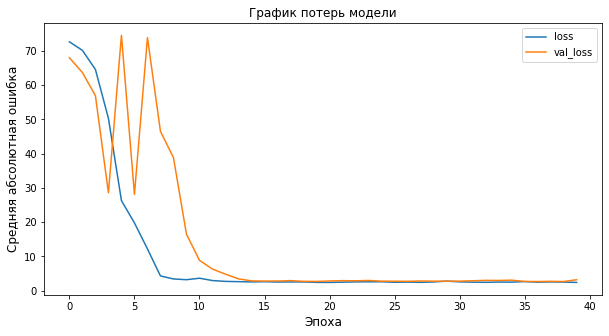

In [160]:
model_loss_plot(history_upr)

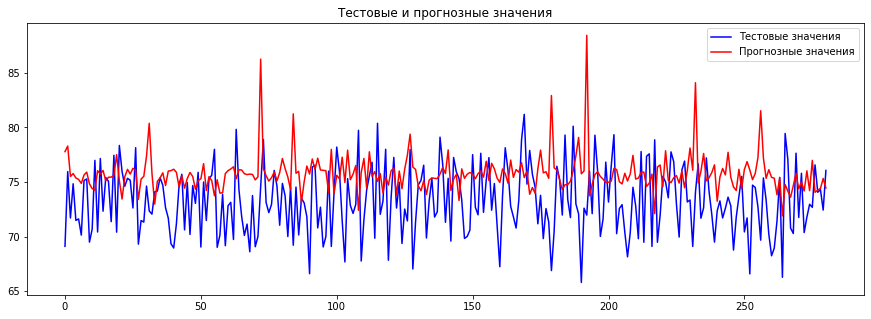

In [161]:
pred_upr = model_upr.predict(np.array((X_test_upr)))
original_upr = y_test_upr.values
predicted_upr = pred_upr

actual_and_predicted_plot(original_upr, predicted_upr)

No handles with labels found to put in legend.


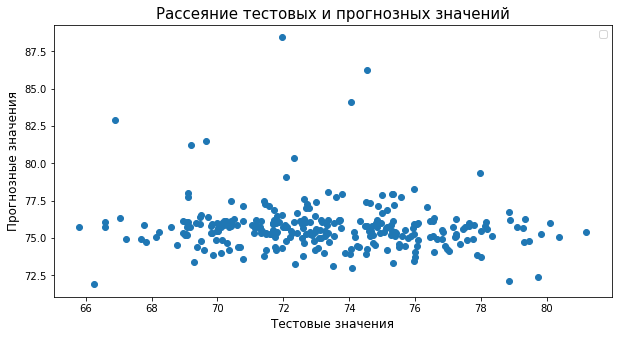

In [162]:
actual_and_predicted_scatter(original_upr, predicted_upr)

In [163]:
model_upr.evaluate(X_test_upr, y_test_upr, verbose=1)

9/9 [==============================] - 0s 3ms/step - loss: 3.5475


3.5474796295166016

In [164]:
np.mean(np.abs(y_test_upr-np.mean(y_test_upr)))

Модуль упругости при растяжении, ГПа    2.516456
dtype: float64

In [205]:
model_upr.save('../stud/lesson/model/my_model_6')

INFO:tensorflow:Assets written to: ../stud/lesson/model/my_model_6\assets


In [206]:
model_upr.save_weights('../stud/lesson/model/my_model_7')

Нейронная сеть для прогноза прочности при растяжении

In [167]:
X_train_pr_norm = normalizer.adapt(np.array(X_train_pr))

In [168]:
model_pr = Sequential(X_train_pr_norm)

model_pr.add(Dense(128))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(64))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(64))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(32))
model_pr.add(BatchNormalization())
model_pr.add(LeakyReLU())
model_pr.add(Dense(1))
model_pr.add(Activation('selu'))

In [169]:
early_pr = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')

In [170]:
model_pr.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.01),
    loss='mean_absolute_error'
    )

In [171]:
%%time
history_pr = model_pr.fit(
    X_train_pr,
    y_train_pr,
    batch_size = 32,
    epochs=300,
    verbose=1,
    validation_split = 0.2,
    callbacks=[early_pr])

Epoch 1/300
17/17 [==============================] - 1s 10ms/step - loss: 2489.8875 - val_loss: 2446.1301
Epoch 2/300
17/17 [==============================] - 0s 3ms/step - loss: 2489.0081 - val_loss: 2444.1292
Epoch 3/300
17/17 [==============================] - 0s 3ms/step - loss: 2488.0740 - val_loss: 2442.5569
Epoch 4/300
17/17 [==============================] - 0s 3ms/step - loss: 2486.9834 - val_loss: 2441.3997
Epoch 5/300
17/17 [==============================] - 0s 3ms/step - loss: 2485.6794 - val_loss: 2440.3943
Epoch 6/300
17/17 [==============================] - 0s 3ms/step - loss: 2484.0569 - val_loss: 2439.2852
Epoch 7/300
17/17 [==============================] - 0s 3ms/step - loss: 2481.9436 - val_loss: 2437.1489
Epoch 8/300
17/17 [==============================] - 0s 3ms/step - loss: 2479.1951 - val_loss: 2436.3835
Epoch 9/300
17/17 [==============================] - 0s 3ms/step - loss: 2475.5354 - val_loss: 2430.7627
Epoch 10/300
17/17 [==============================] - 

17/17 [==============================] - 0s 3ms/step - loss: 357.0550 - val_loss: 377.8438
Epoch 80/300
17/17 [==============================] - 0s 3ms/step - loss: 358.7939 - val_loss: 391.6902
Epoch 81/300
17/17 [==============================] - 0s 3ms/step - loss: 360.0210 - val_loss: 380.8474
Epoch 81: early stopping
Wall time: 5.15 s


In [172]:
model_pr.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1664      
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_6 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 64)               

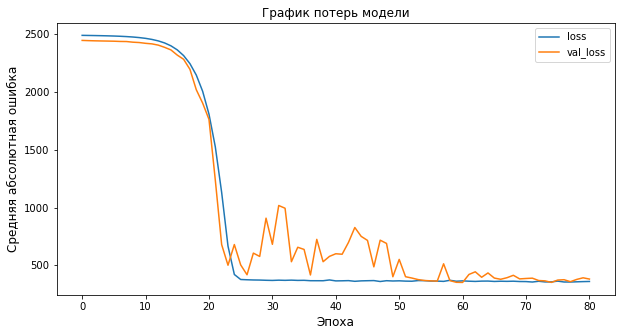

In [173]:
model_loss_plot(history_pr)

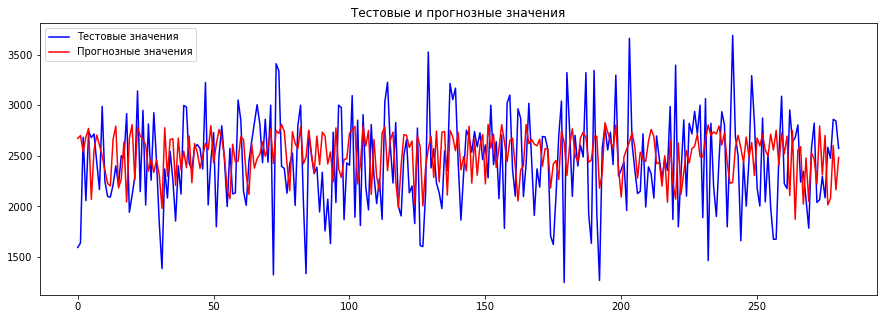

In [174]:
pred_pr = model_pr.predict(np.array((X_test_pr)))
original_pr = y_test_pr.values
predicted_pr = pred_pr

actual_and_predicted_plot(original_pr, predicted_pr)

No handles with labels found to put in legend.


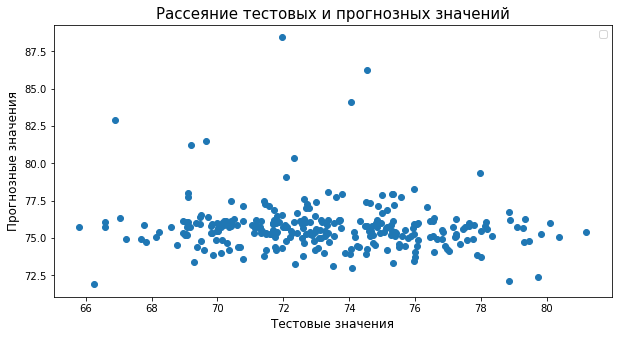

In [175]:
actual_and_predicted_scatter(original_pr, predicted_pr)

In [176]:
model_pr.evaluate(X_test_pr, y_test_pr, verbose=1)

9/9 [==============================] - 0s 1ms/step - loss: 403.2460


403.2459716796875

In [177]:
np.mean(np.abs(y_test_pr-np.mean(y_test_pr)))

Прочность при растяжении, МПа    365.355605
dtype: float64

In [200]:
model_pr.save("../stud/lesson/model/my_model_1")

INFO:tensorflow:Assets written to: ../stud/lesson/model/my_model_1\assets


In [201]:
model_pr.save_weights("../stud/lesson/model/my_model_2")

Нейронная сеть для предсказания соотношения матрица-наполнитель

In [182]:
x_mn = df_3.drop(['Соотношение матрица-наполнитель'], axis=1)
y_mn = df_3[['Соотношение матрица-наполнитель']]

X_train_mn, X_test_mn, y_train_mn, y_test_mn = train_test_split(x_mn, y_mn, test_size=0.3, random_state=1)

In [183]:
X_train_mn_norm = normalizer.adapt(np.array(X_train_mn))

In [184]:
model_mn = Sequential(X_train_mn_norm)

model_mn.add(Dense(128))
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dense(128, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(64, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(32, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(LeakyReLU())
model_mn.add(Dense(16, activation='selu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(1))
model_mn.add(Activation('selu'))

In [185]:
early_mn = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [186]:
model_mn.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.02, momentum=0.5),
    loss='mean_absolute_error')

In [187]:
%%time
history_mn = model_mn.fit(
    X_train_mn,
    y_train_mn,
    batch_size = 64,
    epochs=100,
    verbose=1,
    validation_split = 0.2,
    callbacks = [early_mn]
    )

Epoch 1/100
9/9 [==============================] - 1s 23ms/step - loss: 2.4358 - val_loss: 4.7677
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 1.9214 - val_loss: 4.4990
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 1.6103 - val_loss: 2.6146
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 1.3888 - val_loss: 3.5573
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 1.1157 - val_loss: 1.1763
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.7879 - val_loss: 1.7361
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.7253 - val_loss: 0.9640
Epoch 8/100
9/9 [==============================] - 0s 5ms/step - loss: 0.7217 - val_loss: 0.8493
Epoch 9/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6889 - val_loss: 0.8750
Epoch 10/100
9/9 [==============================] - 0s 5ms/step - loss: 0.7168 - val_loss: 1.0611
Epoch 11/100
9/9 [==========

In [188]:
model_mn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 128)               1664      
                                                                 
 batch_normalization_9 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_10 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_13 (Dense)            (None, 64)               

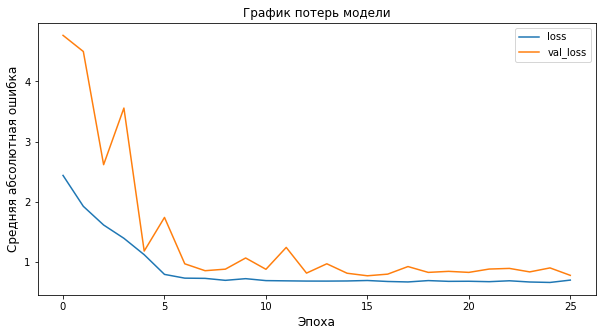

In [189]:
model_loss_plot(history_mn)

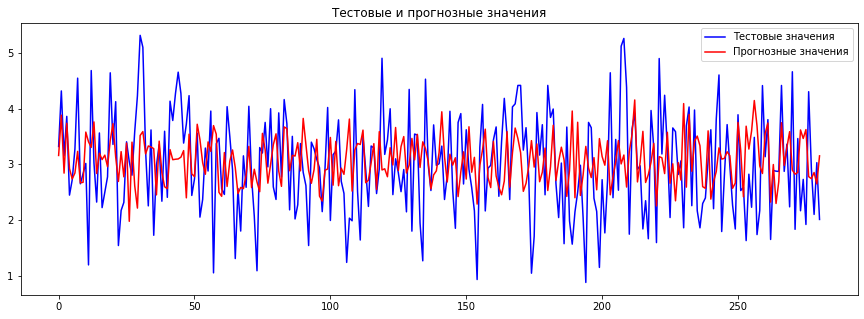

In [190]:
pred_mn = model_mn.predict(np.array((X_test_mn)))
original_mn = y_test_mn.values
predicted_mn = pred_mn

actual_and_predicted_plot(original_mn, predicted_mn)

No handles with labels found to put in legend.


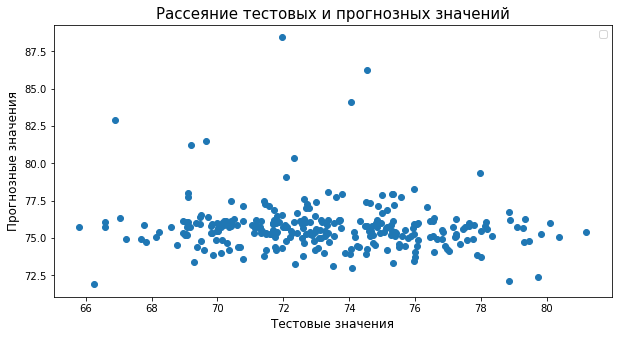

In [191]:
actual_and_predicted_scatter(original_mn, predicted_mn)

In [192]:
model_mn.evaluate(X_test_mn, y_test_mn, verbose=1)

9/9 [==============================] - 0s 2ms/step - loss: 0.7809


0.7808563709259033

In [202]:
model_mn.save("../stud/lesson/model/my_model_3")

INFO:tensorflow:Assets written to: ../stud/lesson/model/my_model_3\assets


In [203]:
model_mn.save_weights("../stud/lesson/model/my_model_4")